# #7 Turning Bullish

### Your Objective

Your dataset for this drill contains daily closing prices for the SPDR S&P 500 ETF Trust (SPY) over the last 5 years.

Your task is to calculate the 50-day and 200-day moving averages based on the closing price, and identify every “Golden Cross” moment – when the short-term average (50-day) crosses from below to above the long-term average (200-day) – signaling a potential bull market.

In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
df = pl.read_csv("SPY_close_price_5Y.csv", try_parse_dates=True)
df = df.with_columns([
	pl.col("Close")
	.rolling_mean(window_size=50, min_samples=50)
	.alias("ma_50"),

	pl.col("Close")
	.rolling_mean(window_size=200, min_samples=200)
	.alias("ma_200")
])

df = df.with_columns(
	pl.when(
		(pl.col("ma_50") > pl.col("ma_200")) &
		(pl.col("ma_50").shift(1) <= pl.col("ma_200").shift(1))
	)
	.then(pl.col("ma_50"))
	.otherwise(None)
	.alias("golden_cross")
)

result = df.filter(pl.col("golden_cross").is_not_null())
result

Date,Close,ma_50,ma_200,golden_cross
date,f64,f64,f64,f64
2023-02-02,416.78,394.3504,394.25025,394.3504
2025-07-01,617.65,583.0978,582.04155,583.0978


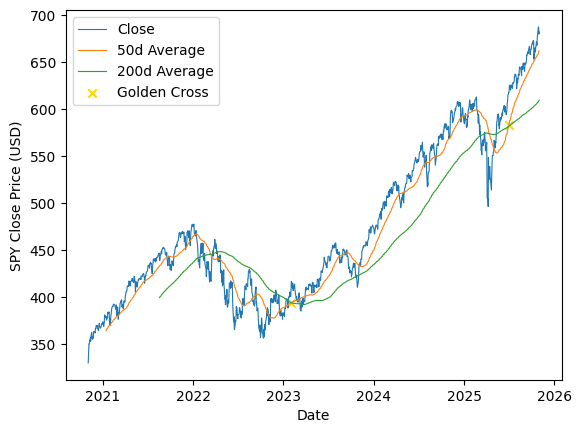

In [3]:
plt.plot(df['Date'], df['Close'], label="Close", linewidth=0.8)
plt.plot(df['Date'], df['ma_50'], label="50d Average", linewidth=0.8)
plt.plot(df['Date'], df['ma_200'], label="200d Average", linewidth=0.8)
plt.scatter(df['Date'], df['golden_cross'], c='gold', marker='x', label="Golden Cross")
plt.xlabel('Date')
plt.ylabel('SPY Close Price (USD)')
plt.legend();